In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D,Flatten,Dropout,Conv2D,Input,Dense
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)

(60000, 28, 28)


In [ ]:
#the data is only 2d
#convolution expects height x width x color
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [ ]:
x_train[0]#the number of classes
k=len(set(y_train))
print(k)

10


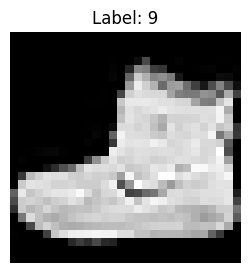

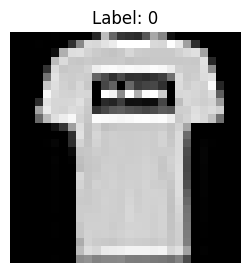

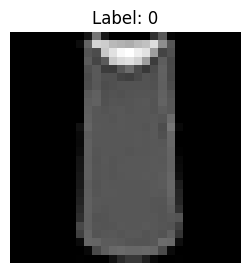

In [ ]:
import matplotlib.pyplot as plt

# Display the first three images from x_train
for i in range(3):
    plt.figure(figsize=(3, 3))
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    plt.show()

In [ ]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(i)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12)

Epoch 1/12
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3956 - accuracy: 0.8569 - val_loss: 0.3266 - val_accuracy: 0.8790
Epoch 2/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2678 - accuracy: 0.8997 - val_loss: 0.2854 - val_accuracy: 0.8915
Epoch 3/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2156 - accuracy: 0.9196 - val_loss: 0.2734 - val_accuracy: 0.9004
Epoch 4/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1752 - accuracy: 0.9339 - val_loss: 0.2786 - val_accuracy: 0.9072
Epoch 5/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1431 - accuracy: 0.9463 - val_loss: 0.2809 - val_accuracy: 0.9083
Epoch 6/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1180 - accuracy: 0.9557 - val_loss: 0.3163 - val_accuracy: 0.9047
Epoch 7/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0988 - accuracy: 0.9627 - val_loss: 0.3216 - val_ac

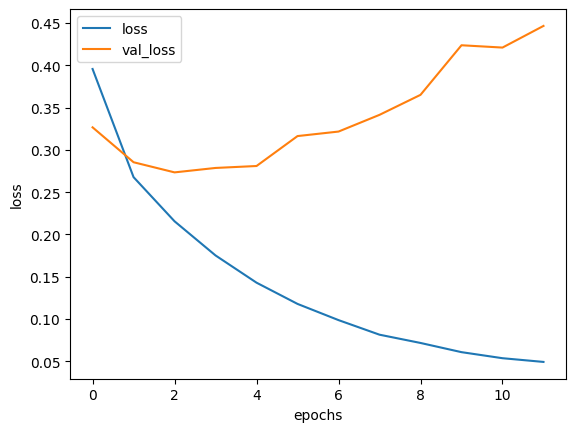

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc=0)

1/1 [==============================] - 0s 117ms/step


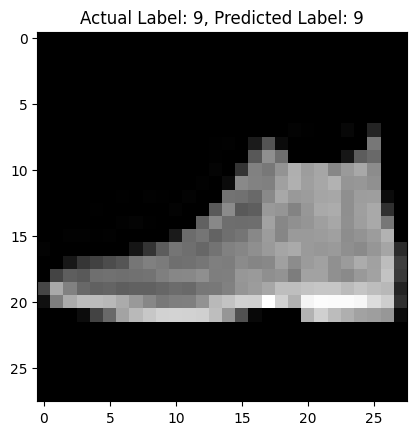

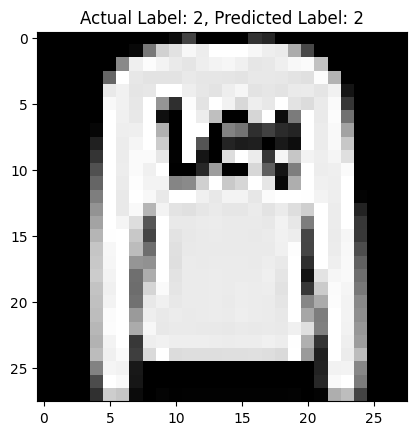

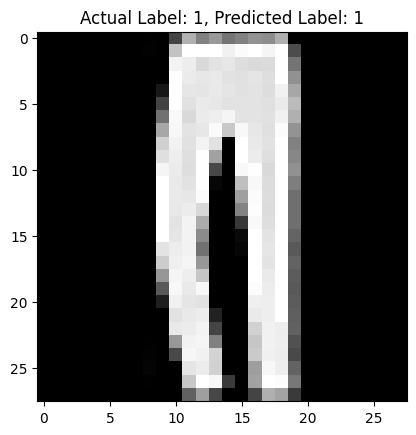

In [ ]:
# Make predictions for the first three images
predictions = model.predict(x_test[:3])

# Convert predictions to class labels (index with the maximum probability)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(3):
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Actual Label: {y_test[i]}, Predicted Label: {predicted_labels[i]}")
    plt.show()


In [ ]:
collab link:https://drive.google.com/drive/folders/103dSV4O1hJueqbFS_28YQQdZTlLvuYXs